In [33]:
# Load all essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score


In [3]:
# 1. Import the “uci-secom.csv” and drop the “Time” column. (1 point)

df = pd.read_csv('uci-secom.csv').drop('Time', axis=1)
df.head( )

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [4]:
# 2. Split the dataset into training (80%) and test set (20%). Consider random effects in
# splitting the dataset 

x = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2 )

In [10]:
# 3a) Train a random forest classifier on the train set with a number of estimators of 20 and a
# maximum depth of 20 for the following cases:
# a) Replacing all the NaN values with 0. (3 points)

df_a = df.fillna( 0 )
x_a = df_a.drop('Pass/Fail', axis=1)
y_a = df_a['Pass/Fail']
x_train_a, x_test_a, y_train_a, y_test_a = train_test_split( x_a, y_a, test_size=0.2 )

rf_classifier_3a = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=42) #Using random state here because it is not classified in the question whether to use random state or not
rf_classifier_3a.fit(x_train_a, y_train_a)

RandomForestClassifier(max_depth=20, n_estimators=20, random_state=42)

In [11]:
# 3b) Replacing all the NaN values with 0 and drop columns with only a single repeating value. (3 points)

df_b = df.fillna( 0 )
df_b = df_b.loc[ :, df_b.nunique( ) > 1 ] # drop columns with only a single repeating value
x_b = df_b.drop('Pass/Fail', axis=1)
y_b = df_b['Pass/Fail']
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split( x_b, y_b, test_size=0.2 )

rf_classifier_3b = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=42) #Using random state here because it is not classified in the question whether to use random state or not
rf_classifier_3b.fit(x_train_b, y_train_b)

RandomForestClassifier(max_depth=20, n_estimators=20, random_state=42)

In [15]:
# 3c) Replacing all the NaN values with 0, drop columns with only a single repeating value, and drop one of each column pair that is correlated with a factor > 0.8. (4 points)

df_c = df.fillna( 0 )
df_c = df_c.loc[ :, df_c.nunique( ) > 1 ] # drop columns with only a single repeating value
corr_matrix_c = df_c.corr().abs() # create a correlation matrix
upper_c = corr_matrix_c.where(np.triu(np.ones(corr_matrix_c.shape), k=1).astype(bool)) # Select upper triangle of correlation matrix
col_to_drop_c = [ column for column in upper_c.columns if any( upper_c[ column ] > 0.8 ) ] # Find index of feature columns with correlation greater than 0.8
df_c = df_c.drop( col_to_drop_c, axis=1 ) # drop one of each column pair that is correlated with a factor > 0.8
x_c = df_c.drop('Pass/Fail', axis=1)
y_c = df_c['Pass/Fail']
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split( x_c, y_c, test_size=0.2 )

rf_classifier_3c = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=42) #Using random state here because it is not classified in the question whether to use random state or not
rf_classifier_3c.fit(x_train_c, y_train_c)

RandomForestClassifier(max_depth=20, n_estimators=20, random_state=42)

In [19]:
# 3d) Replacing all the NaN values with the mean value of the feature. (3 points)

df_d = df.fillna( df.mean() ) # replacing all the NaN values with the mean value of the feature
x_d = df_d.drop('Pass/Fail', axis=1)
y_d = df_d['Pass/Fail']
x_train_d, x_test_d, y_train_d, y_test_d = train_test_split( x_d, y_d, test_size=0.2 )

rf_classifier_3d = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=42) #Using random state here because it is not classified in the question whether to use random state or not
rf_classifier_3d.fit(x_train_d, y_train_d)

RandomForestClassifier(max_depth=20, n_estimators=20, random_state=42)

In [20]:
# 3e) Replacing all the NaN values with the mean value of the feature and drop columns
# with only a single repeating value. (3 points)

df_e = df.fillna( df.mean() ) # replacing all the NaN values with the mean value of the feature
df_e = df_e.loc[ :, df_e.nunique( ) > 1 ] # drop columns with only a single repeating value
x_e = df_e.drop('Pass/Fail', axis=1)
y_e = df_e['Pass/Fail']
x_train_e, x_test_e, y_train_e, y_test_e = train_test_split( x_e, y_e, test_size=0.2 )

rf_classifier_3e = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=42) #Using random state here because it is not classified in the question whether to use random state or not
rf_classifier_3e.fit(x_train_e, y_train_e)

RandomForestClassifier(max_depth=20, n_estimators=20, random_state=42)

In [24]:
# 3f) Replacing all the NaN values with the mean value of the feature, drop columns with
# only a single repeating value, and drop one of each column pair that is correlated with
# a factor > 0.8. (4 points)

df_f = df.fillna( df.mean() ) # replacing all the NaN values with the mean value of the feature
df_f = df_f.loc[ :, df_f.nunique( ) > 1 ] # drop columns with only a single repeating value
corr_matrix_f = df_f.corr().abs() # create a correlation matrix
upper_f = corr_matrix_f.where(np.triu(np.ones(corr_matrix_f.shape), k=1).astype(bool)) # Select upper triangle of correlation matrix
col_to_drop_f = [ column for column in upper_f.columns if any( upper_f[ column ] > 0.8 ) ] # Find index of feature columns with correlation greater than 0.8
df_f = df_f.drop( col_to_drop_f, axis=1 ) # drop one of each column pair that is correlated with a factor > 0.8
x_f = df_f.drop('Pass/Fail', axis=1)
y_f = df_f['Pass/Fail']
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split( x_f, y_f, test_size=0.2 )

rf_classifier_3f = RandomForestClassifier(n_estimators=20, max_depth=20, random_state=42) #Using random state here because it is not classified in the question whether to use random state or not
rf_classifier_3f.fit(x_train_f, y_train_f)

RandomForestClassifier(max_depth=20, n_estimators=20, random_state=42)

Confusion Matrix for Case F: 
 [[292   1]
 [ 21   0]]
Accuracy for Case F:  0.9299363057324841
Sensitivity for Case F:  0.0
Specificity for Case F:  0.9965870307167235
F1 Score for Case F:  0.0


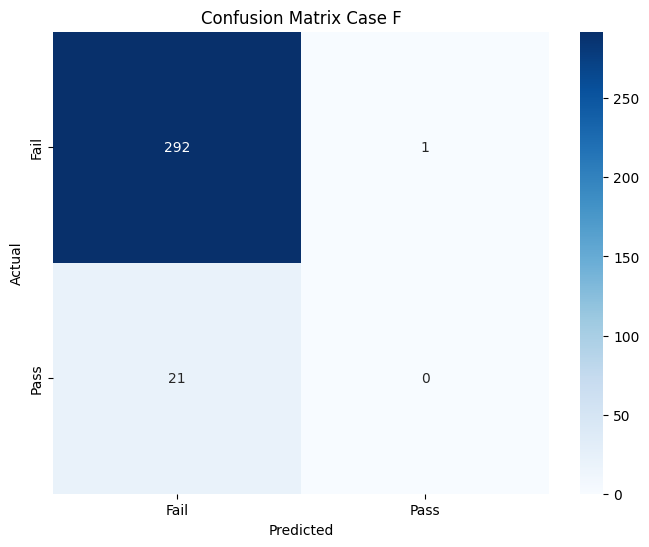

In [31]:
# 4. Evaluate the performance of the models for cases a to f on the test set by providing the
# confusion matrix and metrics of classification (accuracy, sensitivity, specificity, and f1
# score). (6 points)

############################ CASE A ########################################

# # Evaluate performance of the model for case a on the test set
# y_pred_a = rf_classifier_3a.predict( x_test_a )

# # Confusion Matrix
# conf_matrix_a = confusion_matrix( y_test, y_pred_a )

# # Accuracy
# accuracy_a = accuracy_score( y_test, y_pred_a )

# # Sensitivity
# sensitivity_a = recall_score( y_test, y_pred_a )

# # Specificity
# tn_a, fp_a, fn_a, tp_a = conf_matrix_a.ravel()

# # F1 Score
# f1_score_a = f1_score( y_test, y_pred_a )

# # Print the results
# print( 'Confusion Matrix for Case A: \n', conf_matrix_a )
# print( 'Accuracy for Case A: ', accuracy_a )
# print( 'Sensitivity for Case A: ', sensitivity_a )
# print( 'Specificity for Case A: ', tn_a / ( tn_a + fp_a ) )
# print( 'F1 Score for Case A: ', f1_score_a )

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_a, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix Case A')
# plt.show()

############################ CASE B ########################################

# # Evaluate performance of the model for case b on the test set
# y_pred_b = rf_classifier_3b.predict( x_test_b )

# # Confusion Matrix
# conf_matrix_b = confusion_matrix( y_test, y_pred_b )

# # Accuracy
# accuracy_b = accuracy_score( y_test, y_pred_b )

# # Sensitivity
# sensitivity_b = recall_score( y_test, y_pred_b )

# # Specificity
# tn_b, fp_b, fn_b, tp_b = conf_matrix_b.ravel()

# # F1 Score
# f1_score_b = f1_score( y_test, y_pred_b )

# # Print the results
# print( 'Confusion Matrix for Case B: \n', conf_matrix_b )
# print( 'Accuracy for Case B: ', accuracy_b )
# print( 'Sensitivity for Case B: ', sensitivity_b )
# print( 'Specificity for Case B: ', tn_b / ( tn_b + fp_b ) )
# print( 'F1 Score for Case B: ', f1_score_b )

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_b, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix Case B')
# plt.show()

############################ CASE C ########################################

# # Evaluate performance of the model for case c on the test set
# y_pred_c = rf_classifier_3c.predict( x_test_c )

# # Confusion Matrix
# conf_matrix_c = confusion_matrix( y_test, y_pred_c )

# # Accuracy
# accuracy_c = accuracy_score( y_test, y_pred_c )

# # Sensitivity
# sensitivity_c = recall_score( y_test, y_pred_c )

# # Specificity
# tn_c, fp_c, fn_c, tp_c = conf_matrix_c.ravel()

# # F1 Score
# f1_score_c = f1_score( y_test, y_pred_c )

# # Print the results
# print( 'Confusion Matrix for Case C: \n', conf_matrix_c )
# print( 'Accuracy for Case C: ', accuracy_c )
# print( 'Sensitivity for Case C: ', sensitivity_c )
# print( 'Specificity for Case C: ', tn_c / ( tn_c + fp_c ) )
# print( 'F1 Score for Case C: ', f1_score_c )

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_c, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix Case C')
# plt.show()

############################ CASE D ########################################

# # Evaluate performance of the model for case d on the test set
# y_pred_d = rf_classifier_3d.predict( x_test_d )

# # Confusion Matrix
# conf_matrix_d = confusion_matrix( y_test, y_pred_d )

# # Accuracy
# accuracy_d = accuracy_score( y_test, y_pred_d )

# # Sensitivity
# sensitivity_d = recall_score( y_test, y_pred_d )

# # Specificity
# tn_d, fp_d, fn_d, tp_d = conf_matrix_d.ravel()

# # F1 Score
# f1_score_d = f1_score( y_test, y_pred_d )

# # Print the results
# print( 'Confusion Matrix for Case D: \n', conf_matrix_d )
# print( 'Accuracy for Case D: ', accuracy_d )
# print( 'Sensitivity for Case D: ', sensitivity_d )
# print( 'Specificity for Case D: ', tn_d / ( tn_d + fp_d ) )
# print( 'F1 Score for Case D: ', f1_score_d )

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_d, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix Case D')
# plt.show()

############################ CASE E ########################################

# # Evaluate performance of the model for case e on the test set
# y_pred_e = rf_classifier_3e.predict( x_test_e )

# # Confusion Matrix
# conf_matrix_e = confusion_matrix( y_test, y_pred_e )

# # Accuracy
# accuracy_e = accuracy_score( y_test, y_pred_e )

# # Sensitivity
# sensitivity_e = recall_score( y_test, y_pred_e )

# # Specificity
# tn_e, fp_e, fn_e, tp_e = conf_matrix_e.ravel()

# # F1 Score
# f1_score_e = f1_score( y_test, y_pred_e )

# # Print the results
# print( 'Confusion Matrix for Case E: \n', conf_matrix_e )
# print( 'Accuracy for Case E: ', accuracy_e )
# print( 'Sensitivity for Case E: ', sensitivity_e )
# print( 'Specificity for Case E: ', tn_e / ( tn_e + fp_e ) )
# print( 'F1 Score for Case E: ', f1_score_e )

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_e, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix Case E')
# plt.show()

############################ CASE F ######################################## 

# # Evaluate performance of the model for case f on the test set
# y_pred_f = rf_classifier_3f.predict( x_test_f )

# # Confusion Matrix
# conf_matrix_f = confusion_matrix( y_test, y_pred_f )

# # Accuracy
# accuracy_f = accuracy_score( y_test, y_pred_f )

# # Sensitivity
# sensitivity_f = recall_score( y_test, y_pred_f )

# # Specificity
# tn_f, fp_f, fn_f, tp_f = conf_matrix_f.ravel()

# # F1 Score
# f1_score_f = f1_score( y_test, y_pred_f )

# # Print the results
# print( 'Confusion Matrix for Case F: \n', conf_matrix_f )
# print( 'Accuracy for Case F: ', accuracy_f )
# print( 'Sensitivity for Case F: ', sensitivity_f )
# print( 'Specificity for Case F: ', tn_f / ( tn_f + fp_f ) )
# print( 'F1 Score for Case F: ', f1_score_f )

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_f, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.title('Confusion Matrix Case F')
# plt.show()



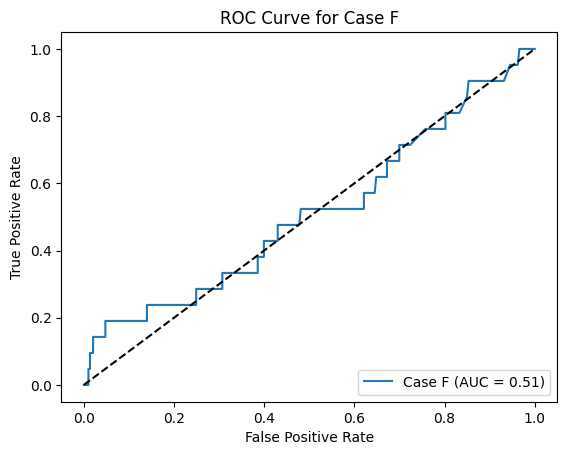

In [41]:
# 5. Plot the ROC curve and print out AUC for cases a to f and discuss the results. (12 points)

############################ CASE A ########################################

# # Get predicted probabilities
# y_pred_prob_a = rf_classifier_3a.predict_proba(x_test_a)[:, 1]

# # Compute ROC curve and AUC
# fpr_a, tpr_a, _ = roc_curve(y_test, y_pred_prob_a)
# auc_a = roc_auc_score(y_test, y_pred_prob_a)

# # Plot ROC curve
# plt.figure()
# plt.plot(fpr_a, tpr_a, label=f'Case A (AUC = {auc_a:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Case A')
# plt.legend(loc='lower right')
# plt.show()

############################ CASE B ########################################

# # Get predicted probabilities
# y_pred_prob_b = rf_classifier_3b.predict_proba(x_test_b)[:, 1]

# # Compute ROC curve and AUC
# fpr_b, tpr_b, _ = roc_curve(y_test, y_pred_prob_b)
# auc_b = roc_auc_score(y_test, y_pred_prob_b)

# # Plot ROC curve
# plt.figure()
# plt.plot(fpr_b, tpr_b, label=f'Case B (AUC = {auc_b:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Case B')
# plt.legend(loc='lower right')
# plt.show()

############################ CASE C ########################################

# # Get predicted probabilities
# y_pred_prob_c = rf_classifier_3c.predict_proba(x_test_c)[:, 1]

# # Compute ROC curve and AUC
# fpr_c, tpr_c, _ = roc_curve(y_test, y_pred_prob_c)
# auc_c = roc_auc_score(y_test, y_pred_prob_c)

# # Plot ROC curve
# plt.figure()
# plt.plot(fpr_c, tpr_c, label=f'Case C (AUC = {auc_c:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Case C')
# plt.legend(loc='lower right')
# plt.show()

############################ CASE D ########################################

# # Get predicted probabilities
# y_pred_prob_d = rf_classifier_3d.predict_proba(x_test_d)[:, 1]

# # Compute ROC curve and AUC
# fpr_d, tpr_d, _ = roc_curve(y_test, y_pred_prob_d)
# auc_d = roc_auc_score(y_test, y_pred_prob_d)

# # Plot ROC curve
# plt.figure()
# plt.plot(fpr_d, tpr_d, label=f'Case D (AUC = {auc_d:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Case D')
# plt.legend(loc='lower right')
# plt.show()

############################ CASE E ########################################

# # Get predicted probabilities
# y_pred_prob_e = rf_classifier_3e.predict_proba(x_test_e)[:, 1]

# # Compute ROC curve and AUC
# fpr_e, tpr_e, _ = roc_curve(y_test, y_pred_prob_e)
# auc_e = roc_auc_score(y_test, y_pred_prob_e)

# # Plot ROC curve
# plt.figure()
# plt.plot(fpr_e, tpr_e, label=f'Case E (AUC = {auc_e:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Case E')
# plt.legend(loc='lower right')
# plt.show()

############################ CASE F ########################################

# # Get predicted probabilities
# y_pred_prob_f = rf_classifier_3f.predict_proba(x_test_f)[:, 1]

# # Compute ROC curve and AUC
# fpr_f, tpr_f, _ = roc_curve(y_test, y_pred_prob_f)
# auc_f = roc_auc_score(y_test, y_pred_prob_f)

# # Plot ROC curve
# plt.figure()
# plt.plot(fpr_f, tpr_f, label=f'Case F (AUC = {auc_f:.2f})')
# plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Case F')
# plt.legend(loc='lower right')
# plt.show()

In [45]:
# 7. Using Mean Decrease in Impurity, show
# the top 20 features that have the highest importance in prediction for cases a to f and
# discuss the results. (6 points)

# For this task we used the ‘feature_importances_’ attribute. This attribute which is in 
# tree-based models such as the RandomForestClassifier in scikit-learn uses Mean Decrease in Impurity ( MDI ) 
# to calculate the importance of each feature. 

# Function to print the top 20 features in table format
def print_feature_importance_table(sorted_idx, feature_importances, columns, case_name):
    print(f"Top 20 features for {case_name}:")
    print(f"{'Rank':<5} | {'Feature':<20} | {'Importance':<10}")
    print("-" * 40)
    for rank, index in enumerate(sorted_idx, start=1):
        print(f"{rank:<5} | {columns[index]:<20} | {feature_importances[index]:<10.4f}")

############################ CASE A ########################################

# Get feature importances
feature_importances_a = rf_classifier_3a.feature_importances_
sorted_idx_a = feature_importances_a.argsort()[::-1][:20]

# Print the top 20 features
print_feature_importance_table(sorted_idx_a, feature_importances_a, x_train_a.columns, "Case A")

############################ CASE B ########################################

# Get feature importances
feature_importances_b = rf_classifier_3b.feature_importances_
sorted_idx_b = feature_importances_b.argsort()[::-1][:20]

# Print the top 20 features
print_feature_importance_table(sorted_idx_b, feature_importances_b, x_train_b.columns, "Case B")

############################ CASE C ########################################

# Get feature importances
feature_importances_c = rf_classifier_3c.feature_importances_
sorted_idx_c = feature_importances_c.argsort()[::-1][:20]

# Print the top 20 features
print_feature_importance_table(sorted_idx_c, feature_importances_c, x_train_c.columns, "Case C")

############################ CASE D ########################################

# Get feature importances
feature_importances_d = rf_classifier_3d.feature_importances_
sorted_idx_d = feature_importances_d.argsort()[::-1][:20]

# Print the top 20 features
print_feature_importance_table(sorted_idx_d, feature_importances_d, x_train_d.columns, "Case D")

############################ CASE E ########################################    

# Get feature importances
feature_importances_e = rf_classifier_3e.feature_importances_
sorted_idx_e = feature_importances_e.argsort()[::-1][:20]

# Print the top 20 features
print_feature_importance_table(sorted_idx_e, feature_importances_e, x_train_e.columns, "Case E")

############################ CASE F ########################################
    
# Get feature importances
feature_importances_f = rf_classifier_3f.feature_importances_
sorted_idx_f = feature_importances_f.argsort()[::-1][:20]

# Print the top 20 features
print_feature_importance_table(sorted_idx_f, feature_importances_f, x_train_f.columns, "Case F")


Top 20 features for Case A:
Rank  | Feature              | Importance
----------------------------------------
1     | 16                   | 0.0123    
2     | 331                  | 0.0107    
3     | 75                   | 0.0102    
4     | 153                  | 0.0096    
5     | 210                  | 0.0090    
6     | 558                  | 0.0084    
7     | 425                  | 0.0083    
8     | 441                  | 0.0081    
9     | 584                  | 0.0080    
10    | 115                  | 0.0079    
11    | 2                    | 0.0078    
12    | 433                  | 0.0077    
13    | 203                  | 0.0077    
14    | 477                  | 0.0072    
15    | 291                  | 0.0071    
16    | 385                  | 0.0071    
17    | 440                  | 0.0070    
18    | 0                    | 0.0069    
19    | 195                  | 0.0069    
20    | 473                  | 0.0068    
Top 20 features for Case B:
Rank  | Feature      